# Word Plot

Helpful reads:

- https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
- https://blog.altoros.com/using-k-means-clustering-in-tensorflow.html
- http://brandonrose.org/clustering
- https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
- http://ai.intelligentonlinetools.com/ml/convert-word-to-vector-glove-python/

Links specific to Textblob:

- https://textblob.readthedocs.io/en/dev/quickstart.html#wordnet-integration
- http://www.nltk.org/howto/wordnet.html
- https://stevenloria.com/wordnet-tutorial/

First thing to do is load in the words from the .csv file into an array called `words`.

In [2]:
words = []
with open("data/inference_words.csv", "r") as file:
    content = file.readlines()
for line in content:
    line_list = line[:-1].split(',')
    words.append(line_list)

### The model:

This is just the starting piont model which gets the ball rolling. Since the words in the top 20 list aren't complete sentences, it can't be expected that this will produce the best result.

In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Create the model
model = Word2Vec(words, min_count=5) # Change min_count to 1 to get every occurance

# Save the model
model.wv.save_word2vec_format('unique_words_model.bin')

# How to load the model:
# new_model = Word2Vec.load('model.bin')

### Visualization for unique words:
Now that a brief model has been created for the words (via word2vec) and saved as a file called `model.bin` we can focus on trying to get the visualization. 

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


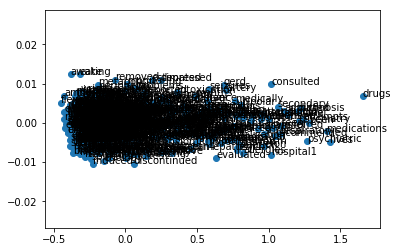

In [8]:
vectors = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create a plot of the project.
%matplotlib inline
pyplot.scatter(result[:, 0], result[:, 1])
model_words = list(model.wv.vocab)
for i, word in enumerate(model_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Using the embeddings for the PCA:

Since there is a new feature vector provided in the `data/embedder` folder which was actually used to get these 20 values; that should be used with Word2Vect.

In [9]:
from gensim.models import KeyedVectors
emb_model = Word2Vec.load("data/embedder/processed_full.w2v") # Vectors used for embedding

# Train the model
vectors = emb_model[sorted(model_words)[1:]]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


IndexError: index 3097 is out of bounds for axis 0 with size 3097

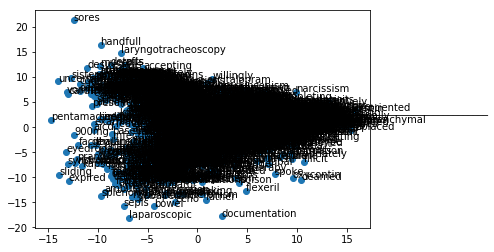

In [145]:
# Make the plot:
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(model_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

### TSNE approach:

- https://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
- https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in sorted(model_words)[1:]:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()



/global/homes/s/shahzeb/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


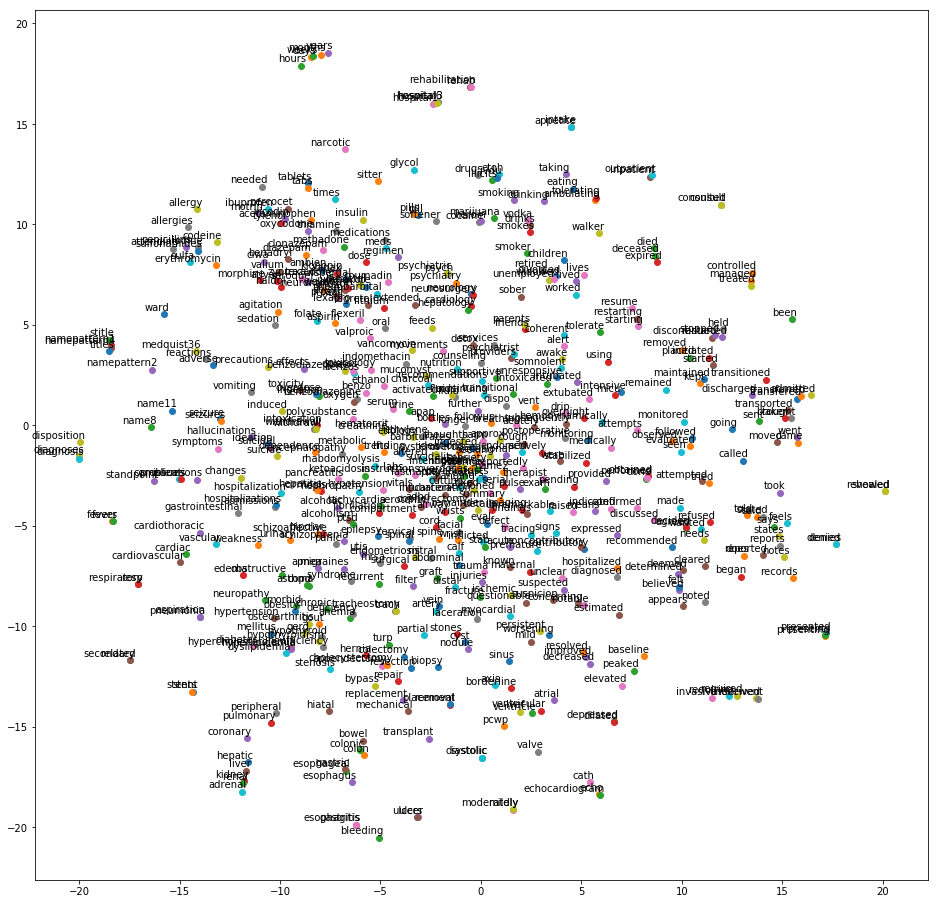

In [17]:
tsne_plot(emb_model)

In [26]:
# Use Plotly for the interactive visuals:
from plotly.offline import init_notebook_mode
import plotly.plotly as py
import plotly.graph_objs as go


import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')


init_notebook_mode(connected=True)

import numpy as np

N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

data = [trace]

In [27]:
py.iplot(data, filename='basic-scatter')

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'DemoAccount', but the supplied API key doesn't match our records. You can view your API key at https://plot.ly/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plot.ly/<language>/getting-started (e.g., https://plot.ly/python/getting-started) for more information.

Make sure that you're logged in as DemoAccount.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.